## Example using kg

In [1]:
import pathlib,sys
sys.path.append('D:\GitHub\myKG')
from kg.measurement_values import measuredValues
from kg.measurement_signal import measuredSignal
from kg.detect import *
from kg.algorithm import *
from kg.widgets import DetectControlWidget
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


setup measurement main directory 'D:\GitHub\myKG\Measurements_example\MBBMZugExample'



In [2]:
mesPath = pathlib.Path('D:\GitHub\myKG\Measurements_example\MBBMZugExample')
mesVal = measuredValues.from_json(mesPath.as_posix())
measuredSignal.setup(mesPath.as_posix())

list all variables in **mesVal**

In [3]:
mesVal.list_variables()

,description,variable
0,None,Temp
1,"Fahrrichtung, 1 süd,0 nord",direction
2,None,rain
3,None,humidity
4,v letzes drehgestell,v2
5,None,axleProLenght
6,None,wind
7,v erstes drehgestell,v1
8,None,trainType
9,None,mTime


### Initiate micSignal Object
parameter: ID, mic, signal,values

In [5]:
mID = 'm_0100'
mic = 6
mesSn = measuredSignal(mID,mic)
y, t, sR = mesSn.get_signal(mic)
values = mesVal.get_variables_values(mID, mic, [ 'Tb','Te','Tp_b','Tp_e','LAEQ'])
print(values)
micSn = MicSignal(mID, mic, y, t, sR, values)

{'Tb': -0.25, 'Tp_b': 1.3083901972185719, 'Te': 7.75, 'LAEQ': 74.15328179307446, 'Tp_e': 5.816493117061226}


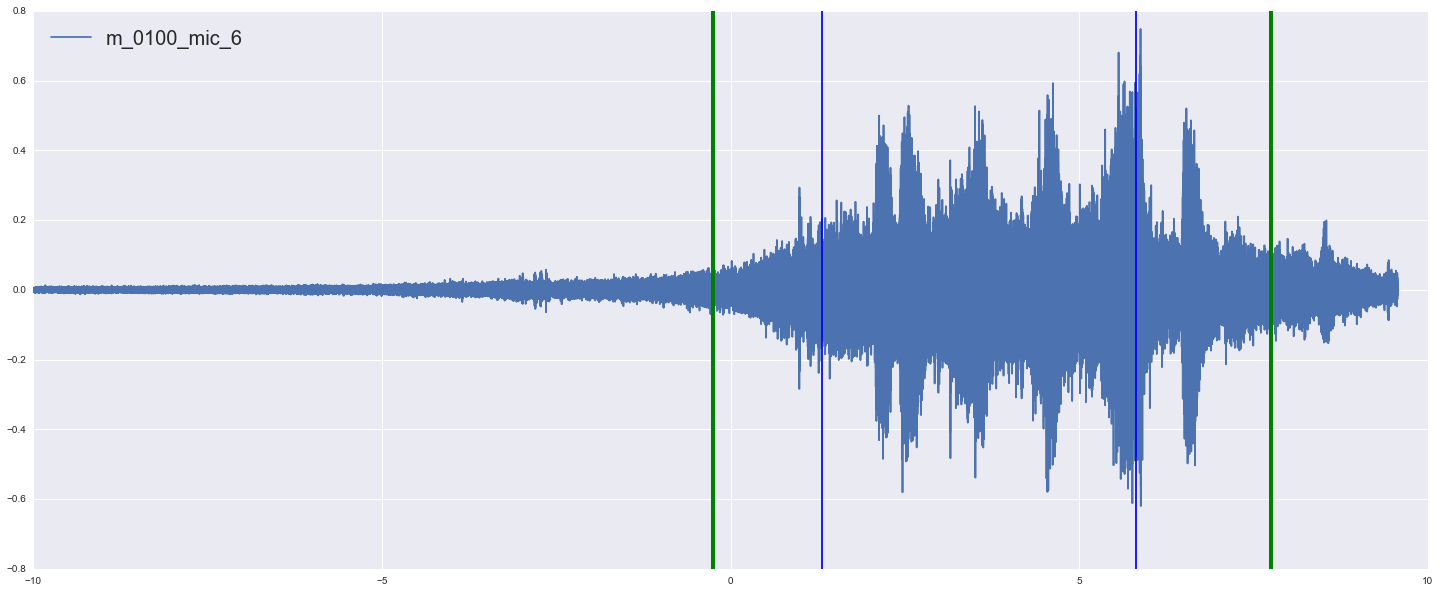

In [6]:
figsize(25,10)
fig, axes = plt.subplots(1,sharex = True)
ax = axes#[0]
micSn.plot_signal(ax)
micSn.plot_triggers(ax,color='green',lw=4)
micSn.plot_triggers(ax,type = 'passby')
ax.legend(loc=2,prop={'size':20})
#ax = axes[1]
#micSn.plot_signal(ax)

### Initiate algorithm 
with parameter

In [7]:
algorithms =[ZischenDetetkt1(3000,0.9,0.02), ZischenDetetkt1(2000,0.8,0.05)]
print(repr(algorithms[0]))

ZischenDetetkt1
description: implement the Algorithm:
        1: stft -> X(k,i)
        2: calculate power per bands for every t_i
        3: build band power ratio (BPR) and compare to threshold for every t_i
        
parameter:
{'fmax': 12000, 'fmin': 200, 'dt': 0.02, 'fc': 3000, 'overlap': 2, 'threshold': 0.9}


In [8]:
for alg in algorithms:
    micSn.calc_kg(alg)

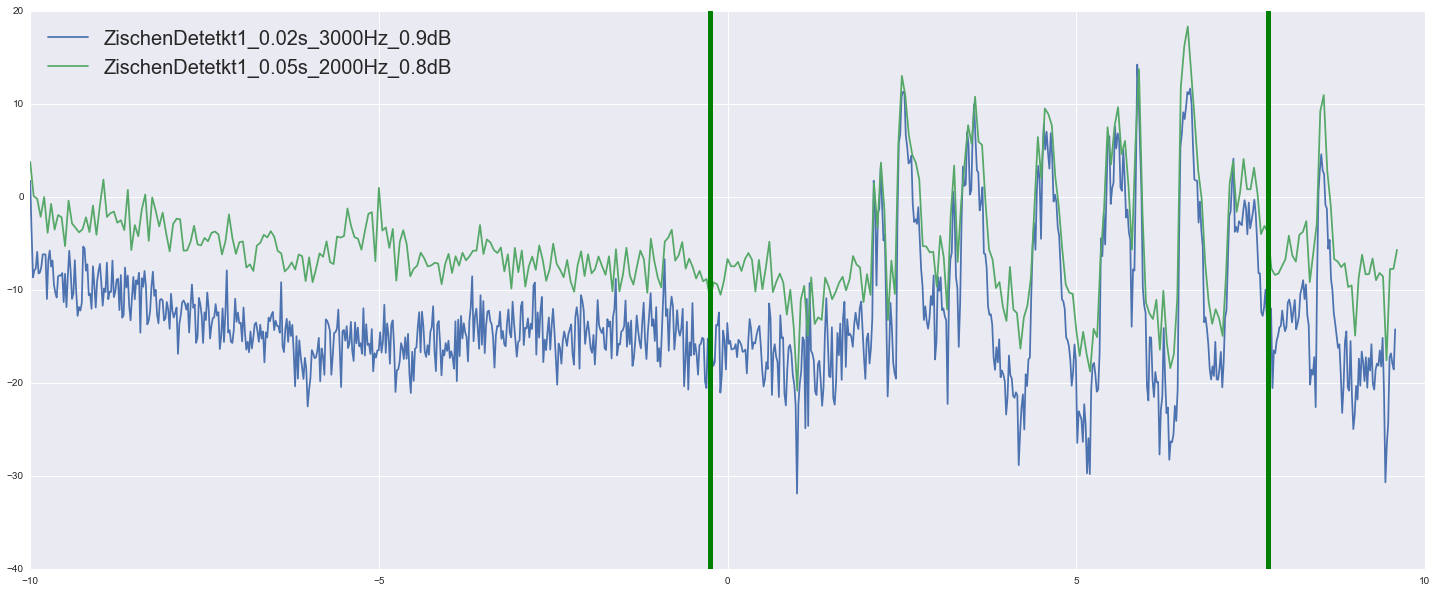

In [9]:
fig,ax =plt.subplots(1)
for alg in algorithms:
    micSn.plot_BPR(alg,ax)
micSn.plot_triggers(ax,color='green',lw=5)
ax.legend(loc=2,prop={'size':20})

## get results and set to mesValues

In [10]:
for alg in algorithms:
    mesVal.set_kg_values(alg,**micSn.get_KG_results(alg))

In [11]:
    mesVal.kg_values_to_json()


In [ ]:
%gui qt
W = DetectControlWidget.alg_results(micSn,mesPath,algorithm)
W.show()